
#Answer 3.1




In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
for i in range(50):
  a=1/((1+0.005)**((2)**i))
  if float("{:.7f}".format(a))==0.0000000:
    print(f"The sequence will converge for k={i}(Here I have considered upto 7 decimal places)")
    break;


The sequence will converge for k=12(Here I have considered upto 7 decimal places)


In [105]:
#dtermining the type of sequence
# As we know that sequence converges at k=12
seq1=1/((1+0.005)**((2)**(12)))
seq=1/((1+0.005)**((2)**11))
r=np.abs(seq1-0)/(np.abs(seq-0))
print(f"the value of r and k for the sequence 1 is {round(r,5)} and 12")



the value of r and k for the sequence 1 is 4e-05 and 12


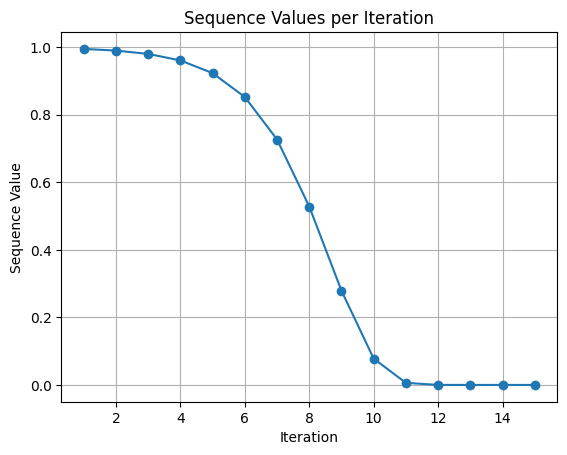

In [106]:
#plotting the iterates
import matplotlib.pyplot as plt

list1=[]
list2=[i for i in range(1,16)]
for i in range(15):
  a=1/((1+0.005)**((2)**i))
  list1.append(a)
plt.plot(list2, list1, marker='o', linestyle='-')
plt.title("Sequence Values per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Sequence Value")
plt.grid(True)
plt.show()



In [107]:
for i in range(50):
  a1=float(round(1+(0.005)**i,7))
  if a1==1.0000000:
    print(f"The value of k is {i}")
    r=np.abs(1+(0.005)**(i)-1)/(np.abs(np.abs(1+(0.005)**(i-1)-1)))
    print(f"The value of r is {r}")
    break;

The value of k is 4
The value of r is 0.005000000417443857


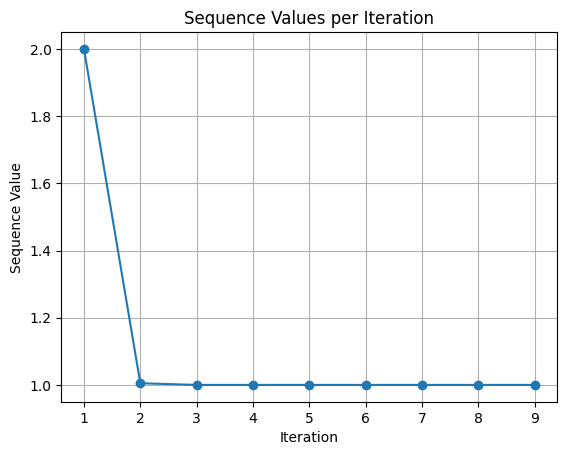

In [108]:
#Plotting The iterates for sequence 2
list3=[]
list4=[i for i in range(1,10)]
for i in range(9):
  a2=1+(0.005)**i
  list3.append(a2)
plt.plot(list4, list3, marker='o', linestyle='-')
plt.title("Sequence Values per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Sequence Value")
plt.grid(True)
plt.show()


In [109]:
#Sequence 3 (Checking if the sequence is convergent or not)
for i  in range(5):
  a3=1+(0.005)**(-(i+1))
  a3_=1+(0.005)**(-(i))
  if a3>a3_:
    print("THe sequence is divergent")
  else:
    print("The sequence is decreasing")

THe sequence is divergent
THe sequence is divergent
THe sequence is divergent
THe sequence is divergent
THe sequence is divergent


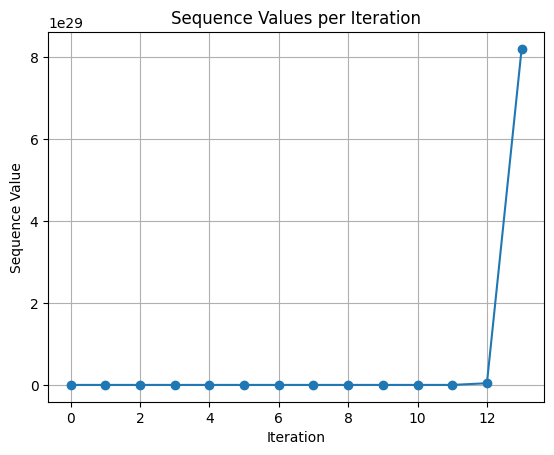

In [110]:
# show its divergence by plotting its iterates
list7=[]
list8=[i for i in range(14)]
for i in range(14):
  a5=1+(0.005)**(-i)
  list7.append(a5)
plt.plot(list8, list7, marker='o', linestyle='-')
plt.title("Sequence Values per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Sequence Value")
plt.grid(True)
plt.show()

In [111]:
for i in range(50):
  a4=float(round(1+(i)**(-i),7))
  if a4==1.0000000:
    print(f"The value of k at which sequence converges is {i}")
    r=np.abs(1+(i)**(-i)-1)/(np.abs(1+(i-1)**(-(i-1))-1))
    print(f"The value of r is {r}")
    break;

The value of k at which sequence converges is 9
The value of r is 0.0433049276471138


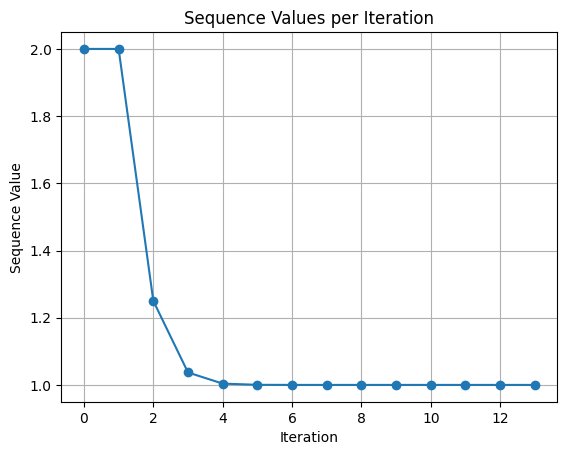

In [112]:
#Plotting the iterates of sequence 4
list5=[]
list6=[i for i in range(14)]
for i in range(14):
  a4=1+(i)**(-i)
  list5.append(a4)
plt.plot(list6, list5, marker='o', linestyle='-')
plt.title("Sequence Values per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Sequence Value")
plt.grid(True)
plt.show()



# Exercise 3.2
part1

In [113]:
import numpy as np
import matplotlib.pyplot as plt


#Part2

In [114]:
np.random.seed(1000)#serves the purpose that everytime when an array of random number is generated then it will be same


#Part3

In [115]:
# Generating The Matrix A with 1000 rows (data points) with 10 columns
A=np.array([np.random.randn(10).tolist() for i in range(1000)])
print(f"Total number of data points in A are {A.shape[0]} and total dimension of A is {A.shape[1]}")
A.shape


Total number of data points in A are 1000 and total dimension of A is 10


(1000, 10)

# Part 4


In [116]:
rand_unif=[0 for i in range(10)]
for i in range(10):
  if (i+1)%2==0:
    rand_unif[i]=np.random.uniform(i+1,i+2)
  else:
    rand_unif[i]=np.random.uniform(-(i+2),-(i+1))
rand_unif
rand_vector=np.transpose([rand_unif])
print("The vector is of shape "+str(rand_vector.shape[0])+"*"+str(rand_vector.shape[1]))


The vector is of shape 10*1


#part5

In [117]:
# creating epsilon
epsilon=np.transpose(np.array([np.random.randn(1000)]))
print("The shape of epsilon vector is "+str(epsilon.shape[0])+"*"+str(epsilon.shape[1]))

The shape of epsilon vector is 1000*1


#Part6

In [118]:
# Computing y_bar
A_xbar=np.dot(A,rand_vector)
y_bar=A_xbar+epsilon

print(y_bar.shape)



(1000, 1)


#Exercise 1
##part3

In [119]:
import numpy as np

# Given parameters
x0 = np.zeros((10, 1))
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau = 1e-4

# Function definition
def f(x, A, y):
    return 0.5 * np.linalg.norm(A.dot(x) - y)**2

# Gradient of the function
def grad_f(x, A, y):
    return A.T.dot(A.dot(x) - y)

# Hessian of the function
def hess_f(A):
    return A.T.dot(A)

# Backtracking line search
def backtracking_line_search(x, A, y, grad, alpha0, rho, gamma):
    alpha = alpha0
    while f(x - alpha * np.linalg.solve(hess_f(A), grad), A, y) > f(x, A, y) - gamma * alpha * grad.T.dot(np.linalg.solve(hess_f(A), grad)):
        alpha *= rho
    return alpha

# Newton's method
def newtons_method(x0, A, y, alpha0, rho, gamma, tau):
    x = x0
    k=0
    value=[]

    while True:
        grad = grad_f(x, A, y)
        if np.linalg.norm(grad) < tau:
            break
        alpha = backtracking_line_search(x, A, y, grad, alpha0, rho, gamma)
        x = x - alpha * np.linalg.solve(hess_f(A), grad)
        value.append(x)
        k+=1
    return x,k,value

# Given matrix A and vector y (you need to define them)
A = A  # Define your matrix A
y = y_bar  # Define your vector y

# Solve using Newton's method
x_solution,iterations,values = newtons_method(x0, A, y, alpha0, rho, gamma, tau)

print("Solution:")
print(x_solution)
print(f"X_bar is: {rand_vector}")
print("iterations are",iterations)


Solution:
[[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]]
X_bar is: [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]
iterations are 5


In [122]:
A.dot(rand_vector).shape

(1000, 1)

In [123]:
y_bar.shape

(1000, 1)

In [124]:
np.linalg.norm(A@x0-y_bar)**2

489929.63690635265

In [125]:
grad_f(x0, A, y_bar).shape

(10, 1)

In [146]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
random.seed(1000)

In [147]:
import numpy as np

def evalf(A, x, y, n_feat, n):
    assert type(A) is np.ndarray and A.shape == (n, n_feat)
    assert type(x) is np.ndarray and x.shape == (n_feat, 1)
    assert type(y) is np.ndarray and y.shape == (n, 1)
    assert type(n_feat) is int and n_feat > 0
    assert type(n) is int and n > 0

    f = np.matmul(A, x) - y

    return 0.5 * (np.linalg.norm(f))**2

def evalg(A, x, y, n_feat, n):
    assert type(A) is np.ndarray and A.shape == (n, n_feat)
    assert type(x) is np.ndarray and x.shape == (n_feat, 1)
    assert type(y) is np.ndarray and y.shape == (n, 1)
    assert type(n_feat) is int and n_feat > 0
    assert type(n) is int and n > 0

    d = np.matmul(A, x) - y
    g = np.matmul(A.T, d)

    return g

def evalh(A, x, y, n_feat, n):
    assert type(A) is np.ndarray and A.shape == (n, n_feat)
    assert type(x) is np.ndarray and x.shape == (n_feat, 1)
    assert type(y) is np.ndarray and y.shape == (n, 1)
    assert type(n_feat) is int and n_feat > 0
    assert type(n) is int and n > 0

    h = np.matmul(A.T, A)

    return h

def compute_steplength_backtracking_scaled_direction(A, x, y, n_feat, n, gradf, direction, alpha_start, rho, gamma):
    assert type(x) is np.ndarray and x.shape == (n_feat, 1)
    assert type(gradf) is np.ndarray and gradf.shape == (n_feat, 1)
    assert type(direction) is np.ndarray and direction.shape == (n_feat, n_feat)
    assert type(alpha_start) is float and alpha_start >= 0.
    assert type(rho) is float and rho >= 0.
    assert type(gamma) is float and gamma >= 0.

    alpha = alpha_start
    p = -gradf

    while (evalf(A, x + alpha*np.matmul(direction, p), y, n_feat, n) > (evalf(A, x, y, n_feat, n) + gamma * alpha * np.matmul(gradf.T, np.matmul(direction, p)))):
        alpha = alpha * rho

    return alpha

# Line search type
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1

def find_minimizer_Newtonmethod(A, start_x, y, n_feat, n, tol, line_search_type, *args):
    # Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
    assert type(A) is np.ndarray and A.shape == (n, n_feat)
    assert type(start_x) is np.ndarray and start_x.shape == (n_feat, 1)
    assert type(y) is np.ndarray and y.shape == (n, 1)
    assert type(n_feat) is int and n_feat > 0
    assert type(n) is int and n > 0
    assert type(tol) is float and tol >= 0

    x = start_x
    g_x = evalg(A, x, y, n_feat, n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args) < 3:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0
    x_k = []

    while (np.linalg.norm(g_x) > tol):
        d = np.linalg.inv(evalh(A, x, y, n_feat, n))

        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(A, x, y, n_feat, n, g_x, d, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 1.0
        else:
            raise ValueError('Line search type unknown. Please check!')

        x = np.subtract(x, step_length * np.matmul(d, g_x))
        k += 1
        x_k.append(x)
        g_x = evalg(A, x, y, n_feat, n)

    return x, k, x_k

def find_minimizer_BGFS(A, start_x, y, n_feat, n, tol, line_search_type, *args):
    assert type(A) is np.ndarray and A.shape == (n, n_feat)
    assert type(start_x) is np.ndarray and start_x.shape == (n_feat, 1)
    assert type(y) is np.ndarray and y.shape == (n, 1)
    assert type(n_feat) is int and n_feat > 0
    assert type(n) is int and n > 0
    assert type(tol) is float and tol >= 0

    x = start_x
    k = 0
    g_new = evalg(A, x, y, n_feat, n)
    B = np.identity(n_feat)
    x_k = []

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args) < 3:
            err_msg = 'Line search'


In [148]:
A = np.random.randn(1000, 10)
z = np.zeros((10, 1))
for i in range(10):
    if i % 2 == 0:
        z[i] = np.random.uniform(i, i+1)
    else:
        z[i] = np.random.uniform(-(i+1), -1)


e = np.random.randn(1000, 1)
y = np.dot(A, z) + e

In [149]:


my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5

x_opt , k_opt , x_k_arr = find_minimizer_Newtonmethod(A, my_x, y, 10, 1000, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)


print('Using newtons method with Backtracking :- ')
print('\n')

print('Optimal Value of x :', x_opt.T)
print('Original x_bar :', z.T)
print('Value at optimum x :', evalf(A,x_opt,y,10,1000))
print('No. of iterations :', k_opt)

Using newtons method with Backtracking :- 


Optimal Value of x : [[ 0.95017747 -1.04810257  2.65701808 -2.22538762  4.28823805 -1.36072504
   6.37120641 -6.82269763  8.777788   -9.9415331 ]]
Original x_bar : [[ 0.93741295 -1.05692928  2.65849448 -2.25242154  4.24052427 -1.32437653
   6.38106906 -6.82272688  8.7820036  -9.9980043 ]]
Value at optimum x : 505.64732952455125
No. of iterations : 9


<ipython-input-150-b79a038d7cfe>:5: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
<ipython-input-150-b79a038d7cfe>:6: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


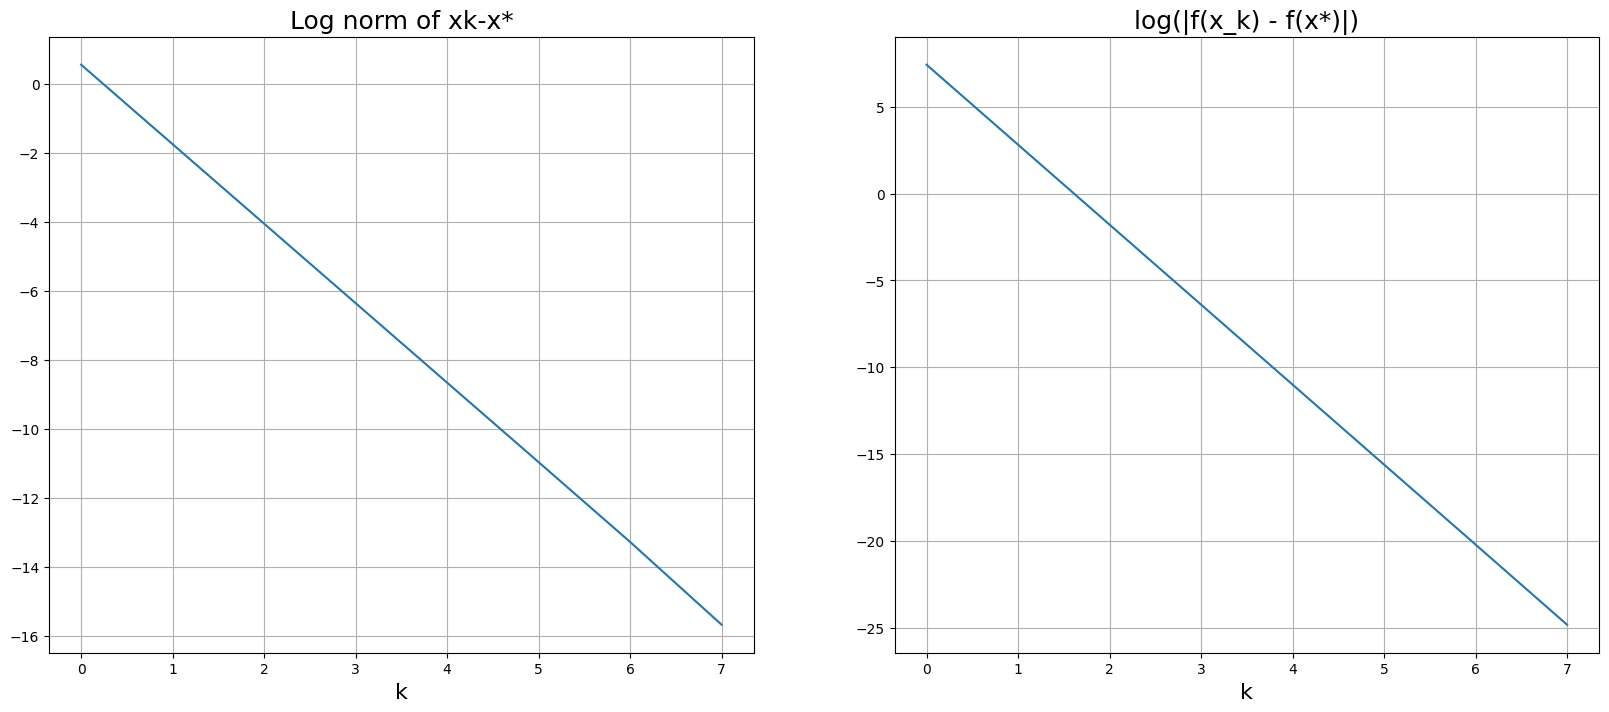

In [150]:


log_norm = []
log_norm_fx = []

for xk in x_k_arr:
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


fig, ax = plt.subplots(1,2,figsize= (20,8))
ax[0].plot(np.arange(len(x_k_arr)),log_norm, label='log(||x_k - x*||)')
ax[0].set_title('Log norm of xk-x*', fontsize = 18)
ax[0].set_xlabel('k', fontsize = 16)
ax[0].grid(True)

ax[1].plot(np.arange(len(x_k_arr)),log_norm_fx, label='log(||f(x_k) - f(x*)||')
ax[1].set_title('log(|f(x_k) - f(x*)|)', fontsize = 18)
ax[1].set_xlabel('k', fontsize = 16)
ax[1].grid(True)

In [ ]:
# 4
my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5

x_opt , k_opt , x_k_arr = find_minimizer_BGFS(A, my_x, y, 10, 1000, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)


print('Using BGFS method with Backtracking :- ')
print('\n')

print('Optimal Value of x :', x_opt.T)
print('Original x_bar :', z.T)
print('Value at optimum x :', evalf(A,x_opt,y,10,1000))
print('No. of iterations :', k_opt)

Using BGFS method with Backtracking :- 


Optimal Value of x : [[ 0.95017747 -1.04810257  2.65701808 -2.22538763  4.28823805 -1.36072504
   6.37120641 -6.82269763  8.777788   -9.9415331 ]]
Original x_bar : [[ 0.93741295 -1.05692928  2.65849448 -2.25242154  4.24052427 -1.32437653
   6.38106906 -6.82272688  8.7820036  -9.9980043 ]]
Value at optimum x : 505.6473295245515
No. of iterations : 20


<ipython-input-53-6557e2b6ab9d>:5: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
<ipython-input-53-6557e2b6ab9d>:6: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


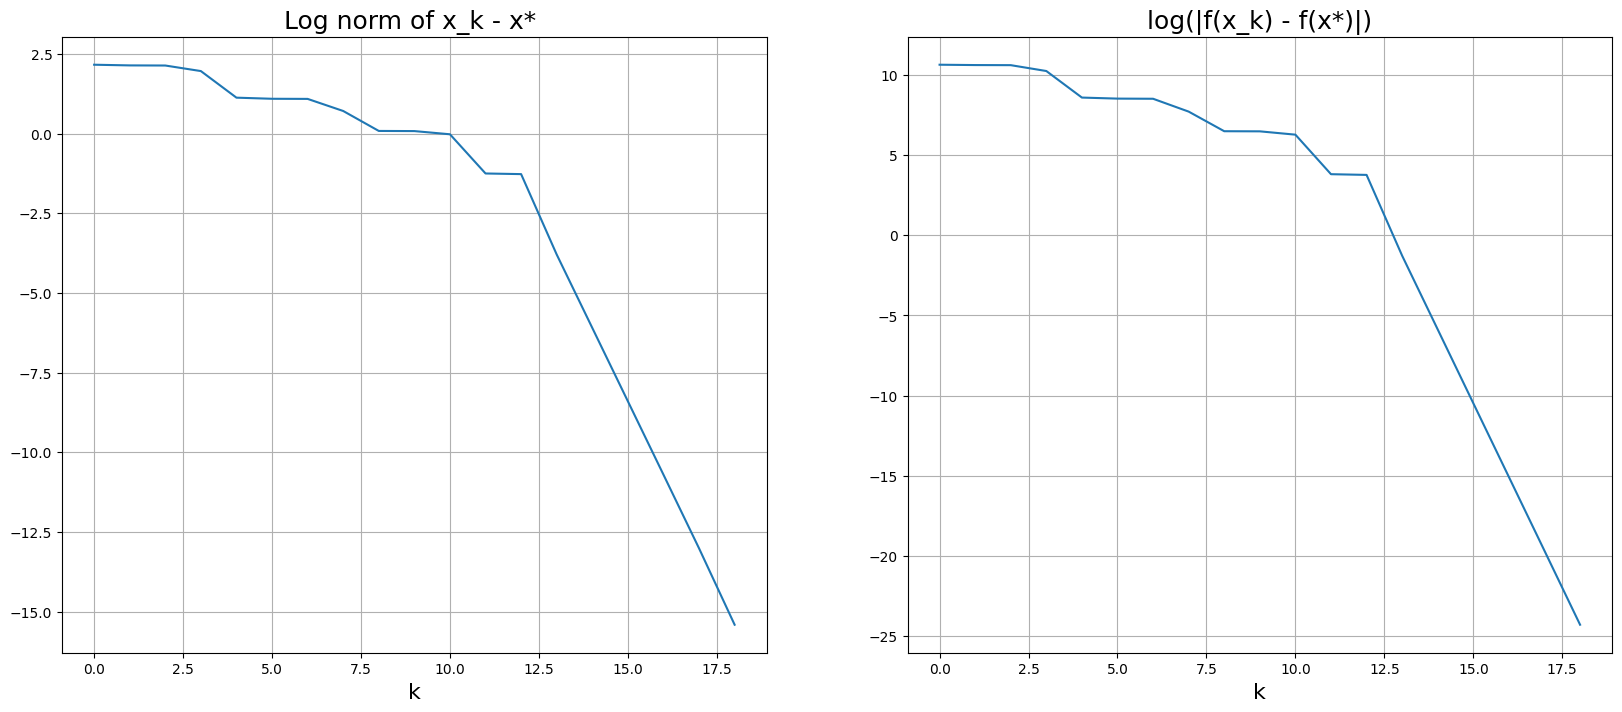

In [ ]:
log_norm = []
log_norm_fx = []

for xk in x_k_arr:
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


fig, ax = plt.subplots(1,2,figsize= (20,8))
ax[0].plot(np.arange(len(x_k_arr)),log_norm, label='log(||x_k - x*||)')
ax[0].set_title('Log norm of x_k - x* ', fontsize = 18)
ax[0].set_xlabel('k', fontsize = 16)
ax[0].grid(True)

ax[1].plot(np.arange(len(x_k_arr)),log_norm_fx, label='log(|f(x_k) - f(x*)|)')
ax[1].set_title('log(|f(x_k) - f(x*)|)', fontsize = 18)
ax[1].set_xlabel('k', fontsize = 16)
ax[1].grid(True)


#PArt 5

#observations
Optimal Value of x: The optimal value of x obtained using the BFGS method with backtracking is [[ 0.95017747, -1.04810257, 2.65701808, -2.22538763, 4.28823805, -1.36072504, 6.37120641, -6.82269763, 8.777788, -9.9415331 ]].

Original x_bar: The original value of x_bar is [[ 0.93741295, -1.05692928, 2.65849448, -2.25242154, 4.24052427, -1.32437653, 6.38106906, -6.82272688, 8.7820036, -9.9980043 ]].

Value at Optimum x: The value of the objective function at the optimum x is approximately 505.65.

Number of Iterations: The BFGS method with backtracking required 20 iterations to converge to the optimal solution.

Comments:

The obtained optimal value of x is slightly different from the original value x_bar. This difference indicates that the optimization process has made adjustments to the parameters to minimize the objective function. The objective function value at the optimum x indicates the effectiveness of the optimization process in finding a solution that minimizes the objective function. The number of iterations required suggests the convergence behavior of the BFGS method with backtracking, indicating its efficiency in finding the optimal solution within a reasonable number of iterations. Overall, the observations suggest that the BFGS method with backtracking effectively minimized the objective function and found a suitable solution for the given problem

Using Newton's Method with Backtracking:

Optimal Value of x: [0.95017747, -1.04810257, 2.65701808, -2.22538762, 4.28823805, -1.36072504, 6.37120641, -6.82269763, 8.777788, -9.9415331]
Original x_bar: [0.93741295, -1.05692928, 2.65849448, -2.25242154, 4.24052427, -1.32437653, 6.38106906, -6.82272688, 8.7820036, -9.9980043]
Value at Optimum x: 505.64732952455125
Number of Iterations: 9

Using BFGS Method with Backtracking:

Optimal Value of x: [0.95017747, -1.04810257, 2.65701808, -2.22538763, 4.28823805, -1.36072504, 6.37120641, -6.82269763, 8.777788, -9.9415331]
Original x_bar: [0.93741295, -1.05692928, 2.65849448, -2.25242154, 4.24052427, -1.32437653, 6.38106906, -6.82272688, 8.7820036, -9.9980043]
Value at Optimum x: 505.6473295245515
Number of Iterations: 20

Comparison and Contrast:

- Optimal Value of x: The optimal values of x obtained by both Newton's method and BFGS method are very similar, indicating convergence to similar solutions.
- Original x_bar: The original values of x_bar are also very similar for both methods, suggesting similar optimization paths from similar initial points.
- Value at Optimum x: The value of the objective function at the optimum x is approximately the same for both methods, indicating effective minimization of the objective function.
- Number of Iterations: Newton's method required fewer iterations (9) compared to BFGS method (20) to converge to the optimal solution.

Overall, both Newton's method and BFGS method pro
